##### Copyright 2021 The TensorFlow Hub Authors.

Licensed under the Apache License, Version 2.0 (the "License");

In [1]:
# Copyright 2021 The TensorFlow Hub Authors. All Rights Reserved.
#
# Licensed under the Apache License, Version 2.0 (the "License");
# you may not use this file except in compliance with the License.
# You may obtain a copy of the License at
#
#     http://www.apache.org/licenses/LICENSE-2.0
#
# Unless required by applicable law or agreed to in writing, software
# distributed under the License is distributed on an "AS IS" BASIS,
# WITHOUT WARRANTIES OR CONDITIONS OF ANY KIND, either express or implied.
# See the License for the specific language governing permissions and
# limitations under the License.
# ==============================================================================

# MoViNet for streaming action recognition 

<table class="tfo-notebook-buttons" align="left">
  <td>
    <a target="_blank" href="https://www.tensorflow.org/hub/tutorials/movinet"><img src="https://www.tensorflow.org/images/tf_logo_32px.png" />View on TensorFlow.org</a>
  </td>
  <td>
    <a target="_blank" href="https://colab.research.google.com/github/tensorflow/hub/blob/master/examples/colab/movinet.ipynb"><img src="https://www.tensorflow.org/images/colab_logo_32px.png" />Run in Google Colab</a>
  </td>
  <td>
    <a target="_blank" href="https://github.com/tensorflow/hub/blob/master/examples/colab/movinet.ipynb"><img src="https://www.tensorflow.org/images/GitHub-Mark-32px.png" />View on GitHub</a>
  </td>
  <td>
    <a href="https://storage.googleapis.com/tensorflow_docs/hub/examples/colab/movinet.ipynb"><img src="https://www.tensorflow.org/images/download_logo_32px.png" />Download notebook</a>
  </td>
  <td>
    <a href="https://tfhub.dev/google/collections/movinet/1"><img src="https://www.tensorflow.org/images/hub_logo_32px.png" />See TF Hub models</a>
  </td>
</table>

This tutorial demonstrates how to use a pretrained video classification model to classify an activity (such as dancing, swimming, biking etc) in the given video.   

The model architecture used in this tutorial is called [MoViNet](https://arxiv.org/pdf/2103.11511.pdf) (Mobile Video Networks). MoVieNets are a family of efficient video classification models trained on huge dataset ([Kinetics 600](https://deepmind.com/research/open-source/kinetics)).

In contrast to the [i3d models](https://tfhub.dev/s?q=i3d-kinetics) available on TF Hub, MoViNets also support frame-by-frame inference on streaming video. 

The pretrained models are available from [TF Hub](https://tfhub.dev/google/collections/movinet/1). The TF Hub collection also includes quantized models optimized for [TFLite](https://tensorflow.org/lite).

The source for these models is available in the [TensorFlow Model Garden](https://github.com/tensorflow/models/tree/master/official/projects/movinet). This includes a [longer version of this tutorial](https://colab.sandbox.google.com/github/tensorflow/models/blob/master/official/projects/movinet/movinet_tutorial.ipynb) that also covers building and fine-tuning a MoViNet model. 

This MoViNet tutorial is part of a series of TensorFlow video tutorials. Here are the other three tutorials:

- [Load video data](https://www.tensorflow.org/tutorials/load_data/video): This tutorial explains how to load and preprocess video data into a TensorFlow dataset pipeline from scratch.
- [Build a 3D CNN model for video classification](https://www.tensorflow.org/tutorials/video/video_classification). Note that this tutorial uses a (2+1)D CNN that decomposes the spatial and temporal aspects of 3D data; if you are using volumetric data such as an MRI scan, consider using a 3D CNN instead of a (2+1)D CNN.
- [Transfer learning for video classification with MoViNet](https://www.tensorflow.org/tutorials/video/transfer_learning_with_movinet): This tutorial explains how to use a pre-trained video classification model trained on a different dataset with the UCF-101 dataset.


![jumping jacks plot](https://storage.googleapis.com/tf_model_garden/vision/movinet/artifacts/jumpingjacks_plot.gif)

## Setup

For inference on smaller models (A0-A2), CPU is sufficient for this Colab.

In [2]:
!sudo apt install -y ffmpeg
!pip install -q mediapy

The following packages were automatically installed and are no longer required:
  libatasmart4 libblockdev-fs2 libblockdev-loop2 libblockdev-part-err2
  libblockdev-part2 libblockdev-swap2 libblockdev-utils2 libblockdev2
  libparted-fs-resize0 libxmlb2
Use 'sudo apt autoremove' to remove them.
The following additional packages will be installed:
  i965-va-driver intel-media-va-driver libaacs0 libaom0 libass9 libavcodec58
  libavdevice58 libavfilter7 libavformat58 libavresample4 libavutil56
  libbdplus0 libbluray2 libbs2b0 libcdio-cdda2 libcdio-paranoia2 libcdio18
  libchromaprint1 libcodec2-0.9 libdc1394-22 libfftw3-double3 libflite1
  libgme0 libgsm1 libigdgmm11 liblilv-0-0 libmysofa1 libopenal-data libopenal1
  libopenmpt0 libpostproc55 librubberband2 libsdl2-2.0-0 libserd-0-0 libshine3
  libsnappy1v5 libsndio7.0 libsord-0-0 libsratom-0-0 libssh-gcrypt-4
  libswresample3 libswscale5 libva-drm2 libva-x11-2 libva2 libvidstab1.1
  libwebpmux3 libx264-155 libx265-179 libxvidcore4 libzvbi

The following NEW packages will be installed:
  ffmpeg i965-va-driver intel-media-va-driver libaacs0 libaom0 libass9
  libavcodec58 libavdevice58 libavfilter7 libavformat58 libavresample4
  libavutil56 libbdplus0 libbluray2 libbs2b0 libcdio-cdda2 libcdio-paranoia2
  libcdio18 libchromaprint1 libcodec2-0.9 libdc1394-22 libfftw3-double3
  libflite1 libgme0 libgsm1 libigdgmm11 liblilv-0-0 libmysofa1 libopenal-data
  libopenal1 libopenmpt0 libpostproc55 librubberband2 libsdl2-2.0-0
  libserd-0-0 libshine3 libsnappy1v5 libsndio7.0 libsord-0-0 libsratom-0-0
  libssh-gcrypt-4 libswresample3 libswscale5 libva-drm2 libva-x11-2 libva2
  libvidstab1.1 libwebpmux3 libx264-155 libx265-179 libxvidcore4
  libzvbi-common libzvbi0 mesa-va-drivers ocl-icd-libopencl1 va-driver-all


0 upgraded, 56 newly installed, 0 to remove and 95 not upgraded.


Need to get 42.5 MB of archives.
After this operation, 156 MB of additional disk space will be used.
Get:1 http://us-central1.gce.archive.ubuntu.com/ubuntu focal/universe amd64 libaom0 amd64 1.0.0.errata1-3build1 [1160 kB]
0% [1 libaom0 12.3 kB/1160 kB 1%]

Get:2 http://us-central1.gce.archive.ubuntu.com/ubuntu focal/universe amd64 libva2 amd64 2.7.0-2 [53.5 kB]
Get:3 http://us-central1.gce.archive.ubuntu.com/ubuntu focal/universe amd64 libva-drm2 amd64 2.7.0-2 [7044 B]
Get:4 http://us-central1.gce.archive.ubuntu.com/ubuntu focal/universe amd64 libva-x11-2 amd64 2.7.0-2 [11.9 kB]
Get:5 http://us-central1.gce.archive.ubuntu.com/ubuntu focal/main amd64 ocl-icd-libopencl1 amd64 2.2.11-1ubuntu1 [30.3 kB]
Get:6 http://us-central1.gce.archive.ubuntu.com/ubuntu focal-updates/universe amd64 libavutil56 amd64 7:4.2.7-0ubuntu0.1 [241 kB]
Get:7 http://us-central1.gce.archive.ubuntu.com/ubuntu focal/universe amd64 libcodec2-0.9 amd64 0.9.2-2 [7886 kB]
5% [7 libcodec2-0.9 10.9 kB/7886 kB 0%]

Get:8 http://us-central1.gce.archive.ubuntu.com/ubuntu focal/universe amd64 libgsm1 amd64 1.0.18-2 [24.4 kB]
20% [8 libgsm1 24.4 kB/24.4 kB 100%]

Get:9 http://us-central1.gce.archive.ubuntu.com/ubuntu focal/universe amd64 libshine3 amd64 3.1.1-2 [23.2 kB]
Get:10 http://us-central1.gce.archive.ubuntu.com/ubuntu focal/main amd64 libsnappy1v5 amd64 1.1.8-1build1 [16.7 kB]
Get:11 http://us-central1.gce.archive.ubuntu.com/ubuntu focal-updates/universe amd64 libswresample3 amd64 7:4.2.7-0ubuntu0.1 [57.1 kB]
Get:12 http://us-central1.gce.archive.ubuntu.com/ubuntu focal-updates/main amd64 libwebpmux3 amd64 0.6.1-2ubuntu0.20.04.1 [19.5 kB]
Get:13 http://us-central1.gce.archive.ubuntu.com/ubuntu focal/universe amd64 libx264-155 amd64 2:0.155.2917+git0a84d98-2 [521 kB]
Get:14 http://us-central1.gce.archive.ubuntu.com/ubuntu focal/universe amd64 libx265-179 amd64 3.2.1-1build1 [1060 kB]
Get:15 http://us-central1.gce.archive.ubuntu.com/ubuntu focal/universe amd64 libxvidcore4 amd64 2:1.3.7-1 [201 kB]
Get:16 http://us-central1.gce.archive.ubuntu.com/ubuntu focal/universe amd64 libzvbi-common all 0.2.35-17 [32.5 kB]
Get:17 http://us-central1.g

Get:19 http://us-central1.gce.archive.ubuntu.com/ubuntu focal/universe amd64 libass9 amd64 1:0.14.0-2 [88.0 kB]
Get:20 http://us-central1.gce.archive.ubuntu.com/ubuntu focal/universe amd64 libbluray2 amd64 1:1.2.0-1 [138 kB]
Get:21 http://us-central1.gce.archive.ubuntu.com/ubuntu focal/universe amd64 libchromaprint1 amd64 1.4.3-3build1 [37.6 kB]
Get:22 http://us-central1.gce.archive.ubuntu.com/ubuntu focal/universe amd64 libgme0 amd64 0.6.2-1build1 [123 kB]
Get:23 http://us-central1.gce.archive.ubuntu.com/ubuntu focal/universe amd64 libopenmpt0 amd64 0.4.11-1build1 [599 kB]
Get:24 http://us-central1.gce.archive.ubuntu.com/ubuntu focal-updates/main amd64 libssh-gcrypt-4 amd64 0.9.3-2ubuntu2.2 [202 kB]
Get:25 http://us-central1.gce.archive.ubuntu.com/ubuntu focal-updates/universe amd64 libavformat58 amd64 7:4.2.7-0ubuntu0.1 [985 kB]
Get:26 http://us-central1.gce.archive.ubuntu.com/ubuntu focal/universe amd64 libbs2b0 amd64 3.1.0+dfsg-2.2build1 [10.2 kB]
Get:27 http://us-central1.gce.arch

Get:28 http://us-central1.gce.archive.ubuntu.com/ubuntu focal/universe amd64 libserd-0-0 amd64 0.30.2-1 [46.6 kB]
Get:29 http://us-central1.gce.archive.ubuntu.com/ubuntu focal/universe amd64 libsord-0-0 amd64 0.16.4-1 [19.5 kB]
Get:30 http://us-central1.gce.archive.ubuntu.com/ubuntu focal/universe amd64 libsratom-0-0 amd64 0.6.4-1 [16.9 kB]
Get:31 http://us-central1.gce.archive.ubuntu.com/ubuntu focal-updates/universe amd64 liblilv-0-0 amd64 0.24.6-1ubuntu0.1 [40.6 kB]
Get:32 http://us-central1.gce.archive.ubuntu.com/ubuntu focal/universe amd64 libmysofa1 amd64 1.0~dfsg0-1 [39.2 kB]
Get:33 http://us-central1.gce.archive.ubuntu.com/ubuntu focal-updates/universe amd64 libpostproc55 amd64 7:4.2.7-0ubuntu0.1 [55.0 kB]


Get:34 http://us-central1.gce.archive.ubuntu.com/ubuntu focal/main amd64 libfftw3-double3 amd64 3.3.8-2ubuntu1 [728 kB]
Get:35 http://us-central1.gce.archive.ubuntu.com/ubuntu focal/universe amd64 librubberband2 amd64 1.8.2-1build1 [89.4 kB]
Get:36 http://us-central1.gce.archive.ubuntu.com/ubuntu focal-updates/universe amd64 libswscale5 amd64 7:4.2.7-0ubuntu0.1 [157 kB]
Get:37 http://us-central1.gce.archive.ubuntu.com/ubuntu focal/universe amd64 libvidstab1.1 amd64 1.1.0-2 [35.0 kB]
Get:38 http://us-central1.gce.archive.ubuntu.com/ubuntu focal-updates/universe amd64 libavfilter7 amd64 7:4.2.7-0ubuntu0.1 [1085 kB]
Get:39 http://us-central1.gce.archive.ubuntu.com/ubuntu focal/main amd64 libcdio18 amd64 2.0.0-2 [58.6 kB]
Get:40 http://us-central1.gce.archive.ubuntu.com/ubuntu focal/main amd64 libcdio-cdda2 amd64 10.2+2.0.0-1 [17.6 kB]
Get:41 http://us-central1.gce.archive.ubuntu.com/ubuntu focal/main amd64 libcdio-paranoia2 amd64 10.2+2.0.0-1 [16.2 kB]
Get:42 http://us-central1.gce.archiv

Get:50 http://us-central1.gce.archive.ubuntu.com/ubuntu focal/universe amd64 libigdgmm11 amd64 20.1.1+ds1-1 [111 kB]
Get:51 http://us-central1.gce.archive.ubuntu.com/ubuntu focal/universe amd64 intel-media-va-driver amd64 20.1.1+dfsg1-1 [1764 kB]
Get:52 http://us-central1.gce.archive.ubuntu.com/ubuntu focal/universe amd64 libaacs0 amd64 0.9.0-2 [50.1 kB]
Get:53 http://us-central1.gce.archive.ubuntu.com/ubuntu focal/universe amd64 libbdplus0 amd64 0.1.2-3 [47.3 kB]
Get:54 http://us-central1.gce.archive.ubuntu.com/ubuntu focal-updates/universe amd64 mesa-va-drivers amd64 21.2.6-0ubuntu0.1~20.04.2 [2970 kB]
92% [54 mesa-va-drivers 4874 B/2970 kB 0%]

Get:55 http://us-central1.gce.archive.ubuntu.com/ubuntu focal/universe amd64 i965-va-driver amd64 2.4.0-0ubuntu1 [924 kB]
98% [55 i965-va-driver 8043 B/924 kB 1%]

Get:56 http://us-central1.gce.archive.ubuntu.com/ubuntu focal/universe amd64 va-driver-all amd64 2.7.0-2 [4020 B]
Fetched 42.5 MB in 1s (50.5 MB/s)


Extracting templates from packages: 53%

Extracting templates from packages: 100%



78Selecting previously unselected package libaom0:amd64.


(Reading database ... 139804 files and directories currently installed.)


Preparing to unpack .../00-libaom0_1.0.0.errata1-3build1_amd64.deb ...
7Progress: [  0%] [..........................................................] 8Unpacking libaom0:amd64 (1.0.0.errata1-3build1) ...


Selecting previously unselected package libva2:amd64.


Preparing to unpack .../01-libva2_2.7.0-2_amd64.deb ...
7Progress: [  1%] [..........................................................] 8Unpacking libva2:amd64 (2.7.0-2) ...


Selecting previously unselected package libva-drm2:amd64.
Preparing to unpack .../02-libva-drm2_2.7.0-2_amd64.deb ...
7Progress: [  2%] [#.........................................................] 8Unpacking libva-drm2:amd64 (2.7.0-2) ...


Selecting previously unselected package libva-x11-2:amd64.
Preparing to unpack .../03-libva-x11-2_2.7.0-2_amd64.deb ...
7Progress: [  3%] [#.........................................................] 8Unpacking libva-x11-2:amd64 (2.7.0-2) ...


Selecting previously unselected package ocl-icd-libopencl1:amd64.
Preparing to unpack .../04-ocl-icd-libopencl1_2.2.11-1ubuntu1_amd64.deb ...
7Progress: [  4%] [##........................................................] 8Unpacking ocl-icd-libopencl1:amd64 (2.2.11-1ubuntu1) ...


Selecting previously unselected package libavutil56:amd64.
Preparing to unpack .../05-libavutil56_7%3a4.2.7-0ubuntu0.1_amd64.deb ...
Unpacking libavutil56:amd64 (7:4.2.7-0ubuntu0.1) ...


7Progress: [  5%] [###.......................................................] 8Selecting previously unselected package libcodec2-0.9:amd64.


Preparing to unpack .../06-libcodec2-0.9_0.9.2-2_amd64.deb ...
Unpacking libcodec2-0.9:amd64 (0.9.2-2) ...


7Progress: [  6%] [###.......................................................] 8Selecting previously unselected package libgsm1:amd64.


Preparing to unpack .../07-libgsm1_1.0.18-2_amd64.deb ...
Unpacking libgsm1:amd64 (1.0.18-2) ...
7Progress: [  7%] [####......................................................] 8Selecting previously unselected package libshine3:amd64.


Preparing to unpack .../08-libshine3_3.1.1-2_amd64.deb ...
Unpacking libshine3:amd64 (3.1.1-2) ...
7Progress: [  8%] [####......................................................] 8Selecting previously unselected package libsnappy1v5:amd64.


Preparing to unpack .../09-libsnappy1v5_1.1.8-1build1_amd64.deb ...
Unpacking libsnappy1v5:amd64 (1.1.8-1build1) ...
Selecting previously unselected package libswresample3:amd64.


Preparing to unpack .../10-libswresample3_7%3a4.2.7-0ubuntu0.1_amd64.deb ...
7Progress: [  9%] [#####.....................................................] 8Unpacking libswresample3:amd64 (7:4.2.7-0ubuntu0.1) ...


Selecting previously unselected package libwebpmux3:amd64.
Preparing to unpack .../11-libwebpmux3_0.6.1-2ubuntu0.20.04.1_amd64.deb ...
7Progress: [ 10%] [#####.....................................................] 8Unpacking libwebpmux3:amd64 (0.6.1-2ubuntu0.20.04.1) ...


Selecting previously unselected package libx264-155:amd64.
Preparing to unpack .../12-libx264-155_2%3a0.155.2917+git0a84d98-2_amd64.deb ...
7Progress: [ 11%] [######....................................................] 8Unpacking libx264-155:amd64 (2:0.155.2917+git0a84d98-2) ...


Selecting previously unselected package libx265-179:amd64.
Preparing to unpack .../13-libx265-179_3.2.1-1build1_amd64.deb ...
7Progress: [ 12%] [######....................................................] 8Unpacking libx265-179:amd64 (3.2.1-1build1) ...


Selecting previously unselected package libxvidcore4:amd64.
Preparing to unpack .../14-libxvidcore4_2%3a1.3.7-1_amd64.deb ...
Unpacking libxvidcore4:amd64 (2:1.3.7-1) ...


7Progress: [ 13%] [#######...................................................] 8Selecting previously unselected package libzvbi-common.
Preparing to unpack .../15-libzvbi-common_0.2.35-17_all.deb ...
Unpacking libzvbi-common (0.2.35-17) ...


7Progress: [ 14%] [########..................................................] 8Selecting previously unselected package libzvbi0:amd64.


Preparing to unpack .../16-libzvbi0_0.2.35-17_amd64.deb ...
Unpacking libzvbi0:amd64 (0.2.35-17) ...
7Progress: [ 15%] [########..................................................] 8

Selecting previously unselected package libavcodec58:amd64.
Preparing to unpack .../17-libavcodec58_7%3a4.2.7-0ubuntu0.1_amd64.deb ...
Unpacking libavcodec58:amd64 (7:4.2.7-0ubuntu0.1) ...


7Progress: [ 16%] [#########.................................................] 8

Selecting previously unselected package libass9:amd64.
Preparing to unpack .../18-libass9_1%3a0.14.0-2_amd64.deb ...
Unpacking libass9:amd64 (1:0.14.0-2) ...


Selecting previously unselected package libbluray2:amd64.
Preparing to unpack .../19-libbluray2_1%3a1.2.0-1_amd64.deb ...
7Progress: [ 17%] [##########................................................] 8

Unpacking libbluray2:amd64 (1:1.2.0-1) ...
Selecting previously unselected package libchromaprint1:amd64.


Preparing to unpack .../20-libchromaprint1_1.4.3-3build1_amd64.deb ...
7Progress: [ 18%] [##########................................................] 8Unpacking libchromaprint1:amd64 (1.4.3-3build1) ...


Selecting previously unselected package libgme0:amd64.
Preparing to unpack .../21-libgme0_0.6.2-1build1_amd64.deb ...
7Progress: [ 19%] [###########...............................................] 8Unpacking libgme0:amd64 (0.6.2-1build1) ...


Selecting previously unselected package libopenmpt0:amd64.
Preparing to unpack .../22-libopenmpt0_0.4.11-1build1_amd64.deb ...
7Progress: [ 20%] [###########...............................................] 8Unpacking libopenmpt0:amd64 (0.4.11-1build1) ...


Selecting previously unselected package libssh-gcrypt-4:amd64.
Preparing to unpack .../23-libssh-gcrypt-4_0.9.3-2ubuntu2.2_amd64.deb ...
Unpacking libssh-gcrypt-4:amd64 (0.9.3-2ubuntu2.2) ...


7Progress: [ 21%] [############..............................................] 8Selecting previously unselected package libavformat58:amd64.


Preparing to unpack .../24-libavformat58_7%3a4.2.7-0ubuntu0.1_amd64.deb ...
Unpacking libavformat58:amd64 (7:4.2.7-0ubuntu0.1) ...


7Progress: [ 22%] [############..............................................] 8Selecting previously unselected package libbs2b0:amd64.
Preparing to unpack .../25-libbs2b0_3.1.0+dfsg-2.2build1_amd64.deb ...
Unpacking libbs2b0:amd64 (3.1.0+dfsg-2.2build1) ...


7Progress: [ 23%] [#############.............................................] 8Selecting previously unselected package libflite1:amd64.


Preparing to unpack .../26-libflite1_2.1-release-3_amd64.deb ...
Unpacking libflite1:amd64 (2.1-release-3) ...


7Progress: [ 24%] [#############.............................................] 8Selecting previously unselected package libserd-0-0:amd64.


Preparing to unpack .../27-libserd-0-0_0.30.2-1_amd64.deb ...
Unpacking libserd-0-0:amd64 (0.30.2-1) ...
Selecting previously unselected package libsord-0-0:amd64.


Preparing to unpack .../28-libsord-0-0_0.16.4-1_amd64.deb ...
7Progress: [ 25%] [##############............................................] 8Unpacking libsord-0-0:amd64 (0.16.4-1) ...


Selecting previously unselected package libsratom-0-0:amd64.
Preparing to unpack .../29-libsratom-0-0_0.6.4-1_amd64.deb ...
7Progress: [ 26%] [###############...........................................] 8Unpacking libsratom-0-0:amd64 (0.6.4-1) ...


Selecting previously unselected package liblilv-0-0:amd64.
Preparing to unpack .../30-liblilv-0-0_0.24.6-1ubuntu0.1_amd64.deb ...
7Progress: [ 27%] [###############...........................................] 8Unpacking liblilv-0-0:amd64 (0.24.6-1ubuntu0.1) ...


Selecting previously unselected package libmysofa1:amd64.
Preparing to unpack .../31-libmysofa1_1.0~dfsg0-1_amd64.deb ...
7Progress: [ 28%] [################..........................................] 8Unpacking libmysofa1:amd64 (1.0~dfsg0-1) ...


Selecting previously unselected package libpostproc55:amd64.
Preparing to unpack .../32-libpostproc55_7%3a4.2.7-0ubuntu0.1_amd64.deb ...
Unpacking libpostproc55:amd64 (7:4.2.7-0ubuntu0.1) ...
7Progress: [ 29%] [#################.........................................] 8

Selecting previously unselected package libfftw3-double3:amd64.
Preparing to unpack .../33-libfftw3-double3_3.3.8-2ubuntu1_amd64.deb ...
Unpacking libfftw3-double3:amd64 (3.3.8-2ubuntu1) ...


7Progress: [ 30%] [#################.........................................] 8Selecting previously unselected package librubberband2:amd64.
Preparing to unpack .../34-librubberband2_1.8.2-1build1_amd64.deb ...
Unpacking librubberband2:amd64 (1.8.2-1build1) ...


7Progress: [ 31%] [##################........................................] 8Selecting previously unselected package libswscale5:amd64.


Preparing to unpack .../35-libswscale5_7%3a4.2.7-0ubuntu0.1_amd64.deb ...
Unpacking libswscale5:amd64 (7:4.2.7-0ubuntu0.1) ...
7Progress: [ 32%] [##################........................................] 8

Selecting previously unselected package libvidstab1.1:amd64.
Preparing to unpack .../36-libvidstab1.1_1.1.0-2_amd64.deb ...
Unpacking libvidstab1.1:amd64 (1.1.0-2) ...


Selecting previously unselected package libavfilter7:amd64.
Preparing to unpack .../37-libavfilter7_7%3a4.2.7-0ubuntu0.1_amd64.deb ...
7Progress: [ 33%] [###################.......................................] 8Unpacking libavfilter7:amd64 (7:4.2.7-0ubuntu0.1) ...


Selecting previously unselected package libcdio18:amd64.
Preparing to unpack .../38-libcdio18_2.0.0-2_amd64.deb ...
7Progress: [ 34%] [###################.......................................] 8Unpacking libcdio18:amd64 (2.0.0-2) ...


Selecting previously unselected package libcdio-cdda2:amd64.
Preparing to unpack .../39-libcdio-cdda2_10.2+2.0.0-1_amd64.deb ...
7Progress: [ 35%] [####################......................................] 8Unpacking libcdio-cdda2:amd64 (10.2+2.0.0-1) ...


Selecting previously unselected package libcdio-paranoia2:amd64.
Preparing to unpack .../40-libcdio-paranoia2_10.2+2.0.0-1_amd64.deb ...
7Progress: [ 36%] [####################......................................] 8Unpacking libcdio-paranoia2:amd64 (10.2+2.0.0-1) ...


Selecting previously unselected package libdc1394-22:amd64.
Preparing to unpack .../41-libdc1394-22_2.2.5-2.1_amd64.deb ...
Unpacking libdc1394-22:amd64 (2.2.5-2.1) ...
7Progress: [ 37%] [#####################.....................................] 8

Selecting previously unselected package libopenal-data.
Preparing to unpack .../42-libopenal-data_1%3a1.19.1-1_all.deb ...
Unpacking libopenal-data (1:1.19.1-1) ...


7Progress: [ 38%] [######################....................................] 8Selecting previously unselected package libsndio7.0:amd64.
Preparing to unpack .../43-libsndio7.0_1.5.0-3_amd64.deb ...
Unpacking libsndio7.0:amd64 (1.5.0-3) ...


7Progress: [ 39%] [######################....................................] 8Selecting previously unselected package libopenal1:amd64.
Preparing to unpack .../44-libopenal1_1%3a1.19.1-1_amd64.deb ...
Unpacking libopenal1:amd64 (1:1.19.1-1) ...


7Progress: [ 40%] [#######################...................................] 8Selecting previously unselected package libsdl2-2.0-0:amd64.
Preparing to unpack .../45-libsdl2-2.0-0_2.0.10+dfsg1-3_amd64.deb ...
Unpacking libsdl2-2.0-0:amd64 (2.0.10+dfsg1-3) ...


Selecting previously unselected package libavdevice58:amd64.
Preparing to unpack .../46-libavdevice58_7%3a4.2.7-0ubuntu0.1_amd64.deb ...
7Progress: [ 41%] [#######################...................................] 8Unpacking libavdevice58:amd64 (7:4.2.7-0ubuntu0.1) ...


Selecting previously unselected package libavresample4:amd64.
Preparing to unpack .../47-libavresample4_7%3a4.2.7-0ubuntu0.1_amd64.deb ...
7Progress: [ 42%] [########################..................................] 8Unpacking libavresample4:amd64 (7:4.2.7-0ubuntu0.1) ...


Selecting previously unselected package ffmpeg.
Preparing to unpack .../48-ffmpeg_7%3a4.2.7-0ubuntu0.1_amd64.deb ...
7Progress: [ 43%] [#########################.................................] 8

Unpacking ffmpeg (7:4.2.7-0ubuntu0.1) ...


Selecting previously unselected package libigdgmm11:amd64.
Preparing to unpack .../49-libigdgmm11_20.1.1+ds1-1_amd64.deb ...
7Progress: [ 44%] [#########################.................................] 8Unpacking libigdgmm11:amd64 (20.1.1+ds1-1) ...


Selecting previously unselected package intel-media-va-driver:amd64.


Preparing to unpack .../50-intel-media-va-driver_20.1.1+dfsg1-1_amd64.deb ...
Unpacking intel-media-va-driver:amd64 (20.1.1+dfsg1-1) ...


7Progress: [ 45%] [##########################................................] 8Selecting previously unselected package libaacs0:amd64.
Preparing to unpack .../51-libaacs0_0.9.0-2_amd64.deb ...


Unpacking libaacs0:amd64 (0.9.0-2) ...
7Progress: [ 46%] [##########################................................] 8Selecting previously unselected package libbdplus0:amd64.


Preparing to unpack .../52-libbdplus0_0.1.2-3_amd64.deb ...
Unpacking libbdplus0:amd64 (0.1.2-3) ...
7Progress: [ 47%] [###########################...............................] 8Selecting previously unselected package mesa-va-drivers:amd64.


Preparing to unpack .../53-mesa-va-drivers_21.2.6-0ubuntu0.1~20.04.2_amd64.deb ...
Unpacking mesa-va-drivers:amd64 (21.2.6-0ubuntu0.1~20.04.2) ...


7Progress: [ 48%] [###########################...............................] 8Selecting previously unselected package i965-va-driver:amd64.


Preparing to unpack .../54-i965-va-driver_2.4.0-0ubuntu1_amd64.deb ...
Unpacking i965-va-driver:amd64 (2.4.0-0ubuntu1) ...


Selecting previously unselected package va-driver-all:amd64.


Preparing to unpack .../55-va-driver-all_2.7.0-2_amd64.deb ...
7Progress: [ 49%] [############################..............................] 8Unpacking va-driver-all:amd64 (2.7.0-2) ...


Setting up libgme0:amd64 (0.6.2-1build1) ...
7Progress: [ 50%] [#############################.............................] 8Setting up libssh-gcrypt-4:amd64 (0.9.3-2ubuntu2.2) ...
7Progress: [ 51%] [#############################.............................] 8Setting up libshine3:amd64 (3.1.1-2) ...
7Progress: [ 52%] [##############################............................] 8

Setting up libgsm1:amd64 (1.0.18-2) ...
7Progress: [ 53%] [##############################............................] 8Setting up libx264-155:amd64 (2:0.155.2917+git0a84d98-2) ...
7Progress: [ 54%] [###############################...........................] 8Setting up libx265-179:amd64 (3.2.1-1build1) ...
7Progress: [ 55%] [###############################...........................] 8Setting up libaom0:amd64 (1.0.0.errata1-3build1) ...
7Progress: [ 56%] [################################..........................] 8Setting up libmysofa1:amd64 (1.0~dfsg0-1) ...
Setting up libdc1394-22:amd64 (2.2.5-2.1) ...
7Progress: [ 57%] [#################################.........................] 8Setting up libcdio18:amd64 (2.0.0-2) ...


7Progress: [ 58%] [#################################.........................] 8Setting up libxvidcore4:amd64 (2:1.3.7-1) ...
7Progress: [ 59%] [##################################........................] 8Setting up libsnappy1v5:amd64 (1.1.8-1build1) ...
7Progress: [ 60%] [##################################........................] 8Setting up libass9:amd64 (1:0.14.0-2) ...
7Progress: [ 61%] [###################################.......................] 8Setting up libva2:amd64 (2.7.0-2) ...
7Progress: [ 62%] [####################################......................] 8Setting up libigdgmm11:amd64 (20.1.1+ds1-1) ...
7Progress: [ 63%] [####################################......................] 8Setting up libcodec2-0.9:amd64 (0.9.2-2) ...
7Progress: [ 64%] [#####################################.....................] 8

Setting up intel-media-va-driver:amd64 (20.1.1+dfsg1-1) ...
Setting up libaacs0:amd64 (0.9.0-2) ...
7Progress: [ 65%] [#####################################.....................] 8Setting up libfftw3-double3:amd64 (3.3.8-2ubuntu1) ...
7Progress: [ 66%] [######################################....................] 8Setting up librubberband2:amd64 (1.8.2-1build1) ...
7Progress: [ 67%] [######################################....................] 8Setting up libsndio7.0:amd64 (1.5.0-3) ...
7Progress: [ 68%] [#######################################...................] 8Setting up libbdplus0:amd64 (0.1.2-3) ...
7Progress: [ 69%] [########################################..................] 8

Setting up libvidstab1.1:amd64 (1.1.0-2) ...
7Progress: [ 70%] [########################################..................] 8Setting up libflite1:amd64 (2.1-release-3) ...
7Progress: [ 71%] [#########################################.................] 8Setting up libva-drm2:amd64 (2.7.0-2) ...
7Progress: [ 72%] [#########################################.................] 8Setting up ocl-icd-libopencl1:amd64 (2.2.11-1ubuntu1) ...
Setting up libbs2b0:amd64 (3.1.0+dfsg-2.2build1) ...
7Progress: [ 73%] [##########################################................] 8Setting up libopenal-data (1:1.19.1-1) ...
7Progress: [ 74%] [###########################################...............] 8

Setting up mesa-va-drivers:amd64 (21.2.6-0ubuntu0.1~20.04.2) ...
7Progress: [ 75%] [###########################################...............] 8Setting up libbluray2:amd64 (1:1.2.0-1) ...
7Progress: [ 76%] [############################################..............] 8Setting up libsdl2-2.0-0:amd64 (2.0.10+dfsg1-3) ...
7Progress: [ 77%] [############################################..............] 8Setting up libva-x11-2:amd64 (2.7.0-2) ...
7Progress: [ 78%] [#############################################.............] 8Setting up libwebpmux3:amd64 (0.6.1-2ubuntu0.20.04.1) ...
7Progress: [ 79%] [#############################################.............] 8Setting up libopenmpt0:amd64 (0.4.11-1build1) ...
7Progress: [ 80%] [##############################################............] 8Setting up libzvbi-common (0.2.35-17) ...


Setting up i965-va-driver:amd64 (2.4.0-0ubuntu1) ...
7Progress: [ 81%] [###############################################...........] 8Setting up libserd-0-0:amd64 (0.30.2-1) ...
7Progress: [ 82%] [###############################################...........] 8Setting up libzvbi0:amd64 (0.2.35-17) ...
7Progress: [ 83%] [################################################..........] 8Setting up libcdio-cdda2:amd64 (10.2+2.0.0-1) ...
7Progress: [ 84%] [################################################..........] 8Setting up libcdio-paranoia2:amd64 (10.2+2.0.0-1) ...
7Progress: [ 85%] [#################################################.........] 8Setting up libopenal1:amd64 (1:1.19.1-1) ...


7Progress: [ 86%] [##################################################........] 8Setting up libavutil56:amd64 (7:4.2.7-0ubuntu0.1) ...
7Progress: [ 87%] [##################################################........] 8Setting up va-driver-all:amd64 (2.7.0-2) ...
7Progress: [ 88%] [###################################################.......] 8Setting up libpostproc55:amd64 (7:4.2.7-0ubuntu0.1) ...
Setting up libsord-0-0:amd64 (0.16.4-1) ...
7Progress: [ 89%] [###################################################.......] 8Setting up libsratom-0-0:amd64 (0.6.4-1) ...
7Progress: [ 90%] [####################################################......] 8Setting up libswscale5:amd64 (7:4.2.7-0ubuntu0.1) ...
7Progress: [ 91%] [####################################################......] 8Setting up liblilv-0-0:amd64 (0.24.6-1ubuntu0.1) ...


7Progress: [ 92%] [#####################################################.....] 8Setting up libswresample3:amd64 (7:4.2.7-0ubuntu0.1) ...
7Progress: [ 93%] [######################################################....] 8Setting up libavresample4:amd64 (7:4.2.7-0ubuntu0.1) ...
7Progress: [ 94%] [######################################################....] 8Setting up libavcodec58:amd64 (7:4.2.7-0ubuntu0.1) ...
7Progress: [ 95%] [#######################################################...] 8Setting up libchromaprint1:amd64 (1.4.3-3build1) ...
7Progress: [ 96%] [#######################################################...] 8Setting up libavformat58:amd64 (7:4.2.7-0ubuntu0.1) ...
Setting up libavfilter7:amd64 (7:4.2.7-0ubuntu0.1) ...
7Progress: [ 97%] [########################################################..] 8

Setting up libavdevice58:amd64 (7:4.2.7-0ubuntu0.1) ...
7Progress: [ 98%] [########################################################..] 8Setting up ffmpeg (7:4.2.7-0ubuntu0.1) ...
7Progress: [ 99%] [#########################################################.] 8Processing triggers for man-db (2.9.1-1) ...


Processing triggers for libc-bin (2.31-0ubuntu9.9) ...



78

In [3]:
!pip uninstall -q -y opencv-python-headless
!pip install -q "opencv-python-headless<4.3"

In [4]:
# Import libraries
import pathlib

import matplotlib as mpl
import matplotlib.pyplot as plt
import mediapy as media
import numpy as np
import PIL

import tensorflow as tf
import tensorflow_hub as hub
import tqdm

mpl.rcParams.update({
    'font.size': 10,
})

Get the kinetics 600 label list, and print the first few labels:

In [5]:
labels_path = tf.keras.utils.get_file(
    fname='labels.txt',
    origin='https://raw.githubusercontent.com/tensorflow/models/f8af2291cced43fc9f1d9b41ddbf772ae7b0d7d2/official/projects/movinet/files/kinetics_600_labels.txt'
)
labels_path = pathlib.Path(labels_path)

lines = labels_path.read_text().splitlines()
KINETICS_600_LABELS = np.array([line.strip() for line in lines])
KINETICS_600_LABELS[:20]

array(['background', 'tench', 'goldfish', 'great white shark',
       'tiger shark', 'hammerhead', 'electric ray', 'stingray', 'cock',
       'hen', 'ostrich', 'brambling', 'goldfinch', 'house finch', 'junco',
       'indigo bunting', 'robin', 'bulbul', 'jay', 'magpie'], dtype='<U30')

To provide a simple example video for classification, we can load a short gif of jumping jacks being performed.

![jumping jacks](https://github.com/tensorflow/models/raw/f8af2291cced43fc9f1d9b41ddbf772ae7b0d7d2/official/projects/movinet/files/jumpingjack.gif)

Attribution: Footage shared by [Coach Bobby Bluford](https://www.youtube.com/watch?v=-AxHpj-EuPg) on YouTube under the CC-BY license.

Download the gif.

In [6]:
jumpingjack_url = 'https://github.com/tensorflow/models/raw/f8af2291cced43fc9f1d9b41ddbf772ae7b0d7d2/official/projects/movinet/files/jumpingjack.gif'
jumpingjack_path = tf.keras.utils.get_file(
    fname='jumpingjack.gif',
    origin=jumpingjack_url,
    cache_dir='.', cache_subdir='.',
)

  8192/783318 [..............................] - ETA: 0s

783318/783318 [==============================] - 0s 0us/step


Define a function to read a gif file into a `tf.Tensor`:

In [7]:
#@title
# Read and process a video
def load_gif(file_path, image_size=(224, 224)):
  """Loads a gif file into a TF tensor.

  Use images resized to match what's expected by your model.
  The model pages say the "A2" models expect 224 x 224 images at 5 fps

  Args:
    file_path: path to the location of a gif file.
    image_size: a tuple of target size.

  Returns:
    a video of the gif file
  """
  # Load a gif file, convert it to a TF tensor
  raw = tf.io.read_file(file_path)
  video = tf.io.decode_gif(raw)
  # Resize the video
  video = tf.image.resize(video, image_size)
  # change dtype to a float32
  # Hub models always want images normalized to [0,1]
  # ref: https://www.tensorflow.org/hub/common_signatures/images#input
  video = tf.cast(video, tf.float32) / 255.
  return video

The video's shape is `(frames, height, width, colors)`

In [8]:
jumpingjack=load_gif(jumpingjack_path)
jumpingjack.shape

TensorShape([13, 224, 224, 3])

## How to use the model

This section contains a walkthrough showing how to use the [models from TensorFlow Hub](https://tfhub.dev/google/collections/movinet/1). If you just want to see the models in action, skip to the next section.

There are two versions of each model: `base` and `streaming`.

* The `base` version takes a video as input, and returns the probabilities averaged over the frames.
* The `streaming` version takes a video frame and an RNN state as input, and returns the predictions for that frame, and the new RNN state. 

### The base model

Download the [pretrained model from TensorFlow Hub](https://tfhub.dev/tensorflow/movinet/a2/base/kinetics-600/classification/3). 

In [9]:
%%time
id = 'a2'
mode = 'base'
version = '3'
hub_url = f'https://tfhub.dev/tensorflow/movinet/{id}/{mode}/kinetics-600/classification/{version}'
model = hub.load(hub_url)

CPU times: user 14.3 s, sys: 598 ms, total: 14.9 s
Wall time: 15.1 s


This version of the model has one `signature`. It takes an `image` argument which is a `tf.float32` with shape `(batch, frames, height, width, colors)`. It returns a dictionary containing one output: A `tf.float32` tensor of logits with shape `(batch, classes)`.

In [10]:
sig = model.signatures['serving_default']
print(sig.pretty_printed_signature())

signature_wrapper(*, image)
  Args:
    image: float32 Tensor, shape=(None, None, None, None, 3)
  Returns:
    {'classifier_head': <1>}
      <1>: float32 Tensor, shape=(None, 600)


To run this signature on the video you need to add the outer `batch` dimension to the video first.

In [11]:
#warmup
sig(image = jumpingjack[tf.newaxis, :1]);

In [12]:
%%time
logits = sig(image = jumpingjack[tf.newaxis, ...])
logits = logits['classifier_head'][0]

print(logits.shape)
print()

(600,)

CPU times: user 7.37 s, sys: 221 ms, total: 7.59 s
Wall time: 9.62 s


Define a `get_top_k` function that packages the above output processing for later.

In [13]:
#@title
# Get top_k labels and probabilities
def get_top_k(probs, k=5, label_map=KINETICS_600_LABELS):
  """Outputs the top k model labels and probabilities on the given video.

  Args:
    probs: probability tensor of shape (num_frames, num_classes) that represents
      the probability of each class on each frame.
    k: the number of top predictions to select.
    label_map: a list of labels to map logit indices to label strings.

  Returns:
    a tuple of the top-k labels and probabilities.
  """
  # Sort predictions to find top_k
  top_predictions = tf.argsort(probs, axis=-1, direction='DESCENDING')[:k]
  # collect the labels of top_k predictions
  top_labels = tf.gather(label_map, top_predictions, axis=-1)
  # decode lablels
  top_labels = [label.decode('utf8') for label in top_labels.numpy()]
  # top_k probabilities of the predictions
  top_probs = tf.gather(probs, top_predictions, axis=-1).numpy()
  return tuple(zip(top_labels, top_probs))

Convert the `logits` to probabilities, and look up the top 5 classes for the video. The model confirms that the video is probably of `jumping jacks`.

In [14]:
probs = tf.nn.softmax(logits, axis=-1)
for label, p in get_top_k(probs):
  print(f'{label:20s}: {p:.3f}')

EntleBucher         : 0.834
home theater        : 0.008
miniature poodle    : 0.003
redshank            : 0.003
spider monkey       : 0.002


### The streaming model

The previous section used a model that runs over a whole video. Often when processing a video you don't want a single prediction at the end, you want to update predictions frame by frame. The `stream` versions of the model allow you to do this.

Load the `stream` version of the model.

In [15]:
%%time
id = 'a2'
mode = 'stream'
version = '3'
hub_url = f'https://tfhub.dev/tensorflow/movinet/{id}/{mode}/kinetics-600/classification/{version}'
model = hub.load(hub_url)

CPU times: user 41.9 s, sys: 2.11 s, total: 44 s
Wall time: 44.2 s


Using this model is slightly more complex than the `base` model. You have to keep track of the internal state of the model's RNNs.

In [16]:
list(model.signatures.keys())

['call', 'init_states']

The `init_states` signature takes the video's **shape** `(batch, frames, height, width, colors)` as input, and returns a large dictionary of tensors containing the initial RNN states: 

In [17]:
lines = model.signatures['init_states'].pretty_printed_signature().splitlines()
lines = lines[:10]
lines.append('      ...')
print('.\n'.join(lines))

signature_wrapper(*, input_shape).
  Args:.
    input_shape: int32 Tensor, shape=(5,).
  Returns:.
    {'state/b0/l0/pool_buffer': <1>, 'state/b0/l0/pool_frame_count': <2>, 'state/b0/l1/pool_buffer': <3>, 'state/b0/l1/pool_frame_count': <4>, 'state/b0/l1/stream_buffer': <5>, 'state/b0/l2/pool_buffer': <6>, 'state/b0/l2/pool_frame_count': <7>, 'state/b0/l2/stream_buffer': <8>, 'state/b1/l0/pool_buffer': <9>, 'state/b1/l0/pool_frame_count': <10>, 'state/b1/l0/stream_buffer': <11>, 'state/b1/l1/pool_buffer': <12>, 'state/b1/l1/pool_frame_count': <13>, 'state/b1/l1/stream_buffer': <14>, 'state/b1/l2/pool_buffer': <15>, 'state/b1/l2/pool_frame_count': <16>, 'state/b1/l2/stream_buffer': <17>, 'state/b1/l3/pool_buffer': <18>, 'state/b1/l3/pool_frame_count': <19>, 'state/b1/l3/stream_buffer': <20>, 'state/b1/l4/pool_buffer': <21>, 'state/b1/l4/pool_frame_count': <22>, 'state/b1/l4/stream_buffer': <23>, 'state/b2/l0/pool_buffer': <24>, 'state/b2/l0/pool_frame_count': <25>, 'state/b2/l0/stream_b

In [18]:
initial_state = model.init_states(jumpingjack[tf.newaxis, ...].shape)

In [19]:
type(initial_state)

dict

In [20]:
list(sorted(initial_state.keys()))[:5]

['state/b0/l0/pool_buffer',
 'state/b0/l0/pool_frame_count',
 'state/b0/l1/pool_buffer',
 'state/b0/l1/pool_frame_count',
 'state/b0/l1/stream_buffer']

Once you have the initial state for the RNNs, you can pass the state and a video frame as input (keeping the `(batch, frames, height, width, colors)` shape for the video frame). The model returns a `(logits, state)` pair. 

After just seeing the first frame, the model is not convinced that the video is of "jumping jacks":

In [21]:
inputs = initial_state.copy()

# Add the batch axis, take the first frme, but keep the frame-axis.
inputs['image'] = jumpingjack[tf.newaxis, 0:1, ...] 

In [22]:
# warmup
model(inputs);

In [23]:
logits, new_state = model(inputs)
logits = logits[0]
probs = tf.nn.softmax(logits, axis=-1)

for label, p in get_top_k(probs):
  print(f'{label:20s}: {p:.3f}')

print()

miniature schnauzer : 0.427
corkscrew           : 0.134
miniature poodle    : 0.056
church              : 0.053
fly                 : 0.039



If you run the model in a loop, passing the updated state with each frame, the model quickly converges to the correct result:

In [24]:
%%time
state = initial_state.copy()
all_logits = []

for n in range(len(jumpingjack)):
  inputs = state
  inputs['image'] = jumpingjack[tf.newaxis, n:n+1, ...]
  result, state = model(inputs)
  all_logits.append(logits)

probabilities = tf.nn.softmax(all_logits, axis=-1)

CPU times: user 382 ms, sys: 35.3 ms, total: 417 ms
Wall time: 384 ms


In [25]:
for label, p in get_top_k(probabilities[-1]):
  print(f'{label:20s}: {p:.3f}')

miniature schnauzer : 0.427
corkscrew           : 0.134
miniature poodle    : 0.056
church              : 0.053
fly                 : 0.039


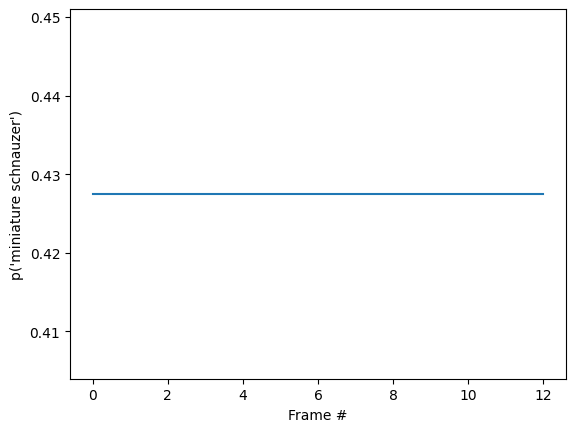

In [26]:
id = tf.argmax(probabilities[-1])
plt.plot(probabilities[:, id])
plt.xlabel('Frame #')
plt.ylabel(f"p('{KINETICS_600_LABELS[id]}')");

You may notice that the final probability is much more certain than in the previous section where you ran the `base` model. The `base` model returns an average of the predictions over the frames.

In [27]:
for label, p in get_top_k(tf.reduce_mean(probabilities, axis=0)):
  print(f'{label:20s}: {p:.3f}')

miniature schnauzer : 0.427
corkscrew           : 0.134
miniature poodle    : 0.056
church              : 0.053
fly                 : 0.039


## Animate the predictions over time

The previous section went into some details about how to use these models. This section builds on top of that to produce some nice inference animations. 

The hidden cell below to defines helper functions used in this section.

In [28]:
#@title
# Get top_k labels and probabilities predicted using MoViNets streaming model
def get_top_k_streaming_labels(probs, k=5, label_map=KINETICS_600_LABELS):
  """Returns the top-k labels over an entire video sequence.

  Args:
    probs: probability tensor of shape (num_frames, num_classes) that represents
      the probability of each class on each frame.
    k: the number of top predictions to select.
    label_map: a list of labels to map logit indices to label strings.

  Returns:
    a tuple of the top-k probabilities, labels, and logit indices
  """
  top_categories_last = tf.argsort(probs, -1, 'DESCENDING')[-1, :1]
  # Sort predictions to find top_k
  categories = tf.argsort(probs, -1, 'DESCENDING')[:, :k]
  categories = tf.reshape(categories, [-1])

  counts = sorted([
      (i.numpy(), tf.reduce_sum(tf.cast(categories == i, tf.int32)).numpy())
      for i in tf.unique(categories)[0]
  ], key=lambda x: x[1], reverse=True)

  top_probs_idx = tf.constant([i for i, _ in counts[:k]])
  top_probs_idx = tf.concat([top_categories_last, top_probs_idx], 0)
  # find unique indices of categories
  top_probs_idx = tf.unique(top_probs_idx)[0][:k+1]
  # top_k probabilities of the predictions
  top_probs = tf.gather(probs, top_probs_idx, axis=-1)
  top_probs = tf.transpose(top_probs, perm=(1, 0))
  # collect the labels of top_k predictions
  top_labels = tf.gather(label_map, top_probs_idx, axis=0)
  # decode the top_k labels
  top_labels = [label.decode('utf8') for label in top_labels.numpy()]

  return top_probs, top_labels, top_probs_idx

# Plot top_k predictions at a given time step
def plot_streaming_top_preds_at_step(
    top_probs,
    top_labels,
    step=None,
    image=None,
    legend_loc='lower left',
    duration_seconds=10,
    figure_height=500,
    playhead_scale=0.8,
    grid_alpha=0.3):
  """Generates a plot of the top video model predictions at a given time step.

  Args:
    top_probs: a tensor of shape (k, num_frames) representing the top-k
      probabilities over all frames.
    top_labels: a list of length k that represents the top-k label strings.
    step: the current time step in the range [0, num_frames].
    image: the image frame to display at the current time step.
    legend_loc: the placement location of the legend.
    duration_seconds: the total duration of the video.
    figure_height: the output figure height.
    playhead_scale: scale value for the playhead.
    grid_alpha: alpha value for the gridlines.

  Returns:
    A tuple of the output numpy image, figure, and axes.
  """
  # find number of top_k labels and frames in the video
  num_labels, num_frames = top_probs.shape
  if step is None:
    step = num_frames
  # Visualize frames and top_k probabilities of streaming video
  fig = plt.figure(figsize=(6.5, 7), dpi=300)
  gs = mpl.gridspec.GridSpec(8, 1)
  ax2 = plt.subplot(gs[:-3, :])
  ax = plt.subplot(gs[-3:, :])
  # display the frame
  if image is not None:
    ax2.imshow(image, interpolation='nearest')
    ax2.axis('off')
  # x-axis (frame number)
  preview_line_x = tf.linspace(0., duration_seconds, num_frames)
  # y-axis (top_k probabilities)
  preview_line_y = top_probs

  line_x = preview_line_x[:step+1]
  line_y = preview_line_y[:, :step+1]

  for i in range(num_labels):
    ax.plot(preview_line_x, preview_line_y[i], label=None, linewidth='1.5',
            linestyle=':', color='gray')
    ax.plot(line_x, line_y[i], label=top_labels[i], linewidth='2.0')


  ax.grid(which='major', linestyle=':', linewidth='1.0', alpha=grid_alpha)
  ax.grid(which='minor', linestyle=':', linewidth='0.5', alpha=grid_alpha)

  min_height = tf.reduce_min(top_probs) * playhead_scale
  max_height = tf.reduce_max(top_probs)
  ax.vlines(preview_line_x[step], min_height, max_height, colors='red')
  ax.scatter(preview_line_x[step], max_height, color='red')

  ax.legend(loc=legend_loc)

  plt.xlim(0, duration_seconds)
  plt.ylabel('Probability')
  plt.xlabel('Time (s)')
  plt.yscale('log')

  fig.tight_layout()
  fig.canvas.draw()

  data = np.frombuffer(fig.canvas.tostring_rgb(), dtype=np.uint8)
  data = data.reshape(fig.canvas.get_width_height()[::-1] + (3,))
  plt.close()

  figure_width = int(figure_height * data.shape[1] / data.shape[0])
  image = PIL.Image.fromarray(data).resize([figure_width, figure_height])
  image = np.array(image)

  return image

# Plotting top_k predictions from MoViNets streaming model
def plot_streaming_top_preds(
    probs,
    video,
    top_k=5,
    video_fps=25.,
    figure_height=500,
    use_progbar=True):
  """Generates a video plot of the top video model predictions.

  Args:
    probs: probability tensor of shape (num_frames, num_classes) that represents
      the probability of each class on each frame.
    video: the video to display in the plot.
    top_k: the number of top predictions to select.
    video_fps: the input video fps.
    figure_fps: the output video fps.
    figure_height: the height of the output video.
    use_progbar: display a progress bar.

  Returns:
    A numpy array representing the output video.
  """
  # select number of frames per second
  video_fps = 8.
  # select height of the image
  figure_height = 500
  # number of time steps of the given video
  steps = video.shape[0]
  # estimate duration of the video (in seconds)
  duration = steps / video_fps
  # estiamte top_k probabilities and corresponding labels
  top_probs, top_labels, _ = get_top_k_streaming_labels(probs, k=top_k)

  images = []
  step_generator = tqdm.trange(steps) if use_progbar else range(steps)
  for i in step_generator:
    image = plot_streaming_top_preds_at_step(
        top_probs=top_probs,
        top_labels=top_labels,
        step=i,
        image=video[i],
        duration_seconds=duration,
        figure_height=figure_height,
    )
    images.append(image)

  return np.array(images)

Start by running the streaming model across the frames of the video, and collecting the logits:

In [29]:
init_states = model.init_states(jumpingjack[tf.newaxis].shape)

In [30]:
# Insert your video clip here
video = jumpingjack
images = tf.split(video[tf.newaxis], video.shape[0], axis=1)

all_logits = []

# To run on a video, pass in one frame at a time
states = init_states
for image in tqdm.tqdm(images):
  # predictions for each frame
  logits, states = model({**states, 'image': image})
  all_logits.append(logits)

# concatinating all the logits
logits = tf.concat(all_logits, 0)
# estimating probabilities
probs = tf.nn.softmax(logits, axis=-1)

  0%|          | 0/13 [00:00<?, ?it/s]

 31%|███       | 4/13 [00:00<00:00, 32.60it/s]

 62%|██████▏   | 8/13 [00:00<00:00, 33.95it/s]

 92%|█████████▏| 12/13 [00:00<00:00, 34.54it/s]

100%|██████████| 13/13 [00:00<00:00, 34.25it/s]

In [31]:
final_probs = probs[-1]
print('Top_k predictions and their probablities\n')
for label, p in get_top_k(final_probs):
  print(f'{label:20s}: {p:.3f}')

Top_k predictions and their probablities

EntleBucher         : 0.999
home theater        : 0.000
redshank            : 0.000
spoonbill           : 0.000
candle              : 0.000


Convert the sequence of probabilities into a video:

In [32]:
# Generate a plot and output to a video tensor
plot_video = plot_streaming_top_preds(probs, video, video_fps=8.)

  0%|          | 0/13 [00:00<?, ?it/s]

  8%|▊         | 1/13 [00:00<00:06,  1.85it/s]

 15%|█▌        | 2/13 [00:01<00:05,  1.97it/s]

 23%|██▎       | 3/13 [00:01<00:05,  1.98it/s]

 31%|███       | 4/13 [00:02<00:04,  1.98it/s]

 38%|███▊      | 5/13 [00:02<00:04,  1.98it/s]

 46%|████▌     | 6/13 [00:03<00:03,  1.98it/s]

 54%|█████▍    | 7/13 [00:03<00:03,  2.00it/s]

 62%|██████▏   | 8/13 [00:04<00:02,  1.99it/s]

 69%|██████▉   | 9/13 [00:04<00:01,  2.00it/s]

 77%|███████▋  | 10/13 [00:05<00:01,  1.99it/s]

 85%|████████▍ | 11/13 [00:05<00:00,  2.00it/s]

 92%|█████████▏| 12/13 [00:06<00:00,  1.99it/s]

100%|██████████| 13/13 [00:06<00:00,  2.00it/s]

100%|██████████| 13/13 [00:06<00:00,  1.99it/s]

In [33]:
# For gif format, set codec='gif'
media.show_video(plot_video, fps=3)

## Resources

The pretrained models are available from [TF Hub](https://tfhub.dev/google/collections/movinet/1). The TF Hub collection also includes quantized models optimized for [TFLite](https://tensorflow.org/lite).

The source for these models is available in the [TensorFlow Model Garden](https://github.com/tensorflow/models/tree/master/official/projects/movinet). This includes a [longer version of this tutorial](https://colab.sandbox.google.com/github/tensorflow/models/blob/master/official/projects/movinet/movinet_tutorial.ipynb) that also covers building and fine-tuning a MoViNet model. 

## Next Steps

To learn more about working with video data in TensorFlow, check out the following tutorials:

* [Load video data](https://www.tensorflow.org/tutorials/load_data/video)
* [Build a 3D CNN model for video classification](https://www.tensorflow.org/tutorials/video/video_classification)
* [Transfer learning for video classification with MoViNet](https://www.tensorflow.org/tutorials/video/transfer_learning_with_movinet)